In [1]:
import pandas as pd
import os
import math
import numpy as np

N_PLANES = 16

def get_interactions(pdb_id, type = 'elec'):
    """
    Get the interactions from the file
    """
    if type == 'elec':
        search_str = f'interchain_elec_intr_{pdb_id}.csv'
        if not os.path.exists(search_str):
            return None
    elif type == 'vdw':
        search_str = f'vdw_intr_{pdb_id}.csv'
        if not os.path.exists(search_str):
            return None
    else:
        return None
    
    interactions = pd.read_csv(search_str)
    return interactions

In [2]:
def get_g_vals(pdb_id):
    """
    Get the g values from the file
    """
    search_str = f'g_vals_{pdb_id}.csv'
    if not os.path.exists(search_str):
        return "file not found"
    g_vals = pd.read_csv(search_str)
    return g_vals


In [3]:
import matplotlib.pyplot as plt

def plot_FE_curve(g_vals, id, save = False):
    '''
    Plot the FE curves for all temperatures
    '''
    for temp in g_vals.columns:
        plt.plot(g_vals[temp], label = temp)
        plt.xticks(range(0, len(g_vals[temp])), range(0, len(g_vals[temp])))

    plt.xlabel("no of interacting blocks")
    plt.ylabel("FE")
    plt.legend()
    plt.title(f'FE curve for PDB ID: {id}')
    if save == True:
        plt.savefig(f'../plots/FE_curve_{id}.jpg')
    plt.show()

    # save the plot in the plots folder
    


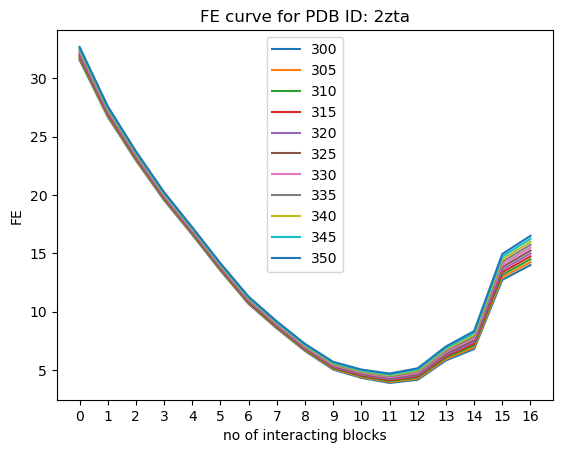

In [4]:
# pdb_ids = ['1afo', '1cx8', '1f88', '2bjn', '2m59', '2zta', '3cap', '3q5w', '4riw', '7sk0', '7sk1', '7vu5']

pdb_ids = ['2zta']

for id in pdb_ids:
    # get the interactions
    elec_interactions = get_interactions(id, 'elec')
    vdw_interactions = get_interactions(id, 'vdw')
    
    if type(elec_interactions) == None:
        print(f'File not found for {id}')
        continue
    
    if type(vdw_interactions) == None:
        print(f'File not found for {id}')
        continue

    # get the g values
    g_vals = get_g_vals(id)
    
    # plot the FE curve
    plot_FE_curve(g_vals, id, save = True)

In [5]:
def get_block_g_vals(id):
   id = '2zta'
   master_matrix = pd.read_csv(f'../master_matrix/master_matrix_{id}.csv')
   min_FE_macrostate = 11
   min_FE_group = master_matrix.groupby('struct_elem').get_group(min_FE_macrostate)

   blockwise_sw = {}
   total_sw = 0
   TEMP = 300
   R = 8.314/1000

   for i in range(len(min_FE_group)):
      row = min_FE_group.iloc[i]
      
      s1 = row.start1
      s2 = row.start2
      e1 = row.end1
      e2 = row.end2
      arr_type = row.type
      sw_part = row.sw_part
      total_sw += sw_part

      if arr_type == 1:
         i = s1
         while i <= e1:
            if i in blockwise_sw.keys():
               blockwise_sw[i] += sw_part
            else:
               blockwise_sw[i] = sw_part
            i+=1
      
      if arr_type == 2:
         i = s1
         while i <= e1:
            if i in blockwise_sw.keys():
               blockwise_sw[i] += sw_part
            else:
               blockwise_sw[i] = sw_part
            i+=1
         i = s2
         while i <= e2:
            if i in blockwise_sw.keys():
               blockwise_sw[i] += sw_part
            else:
               blockwise_sw[i] = sw_part
            i+=1

   blockwise_g_vals = {}
   for i in blockwise_sw.keys():
      blockwise_g_vals[i] = -R*TEMP*math.log(blockwise_sw[i] / total_sw)
   
   blockwise_g_vals = dict(sorted(blockwise_g_vals.items(), key = lambda x: x[0]))
   return blockwise_g_vals



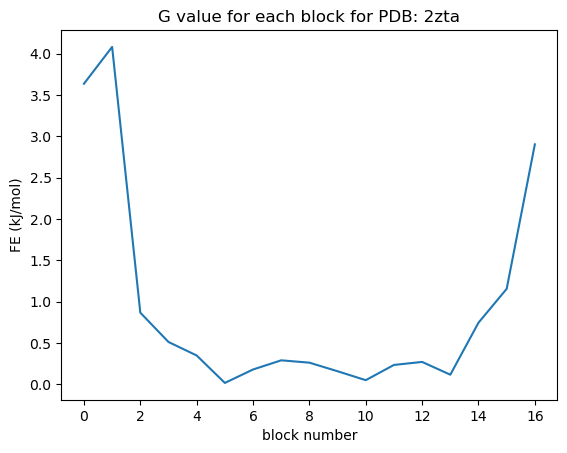

In [6]:
id = '2zta'
block_g_vals = get_block_g_vals(id)

plt.plot(block_g_vals.keys(), block_g_vals.values())
plt.title(f"G value for each block for PDB: {id}")
plt.xlabel('block number')
plt.ylabel('FE (kJ/mol)')
plt.show()


In [7]:
def generate_z_planes(interchain_intr, N_PLANES) -> list[float]:
    z_values = []
    for i in range(len(interchain_intr)):
        z_values.append(interchain_intr.z1.iloc[i])
        z_values.append(interchain_intr.z2.iloc[i])

    z_values = np.array(z_values)
    z_planes = list(np.linspace(z_values.min(), z_values.max(), N_PLANES))
    z_planes.sort()
    return z_planes

In [34]:
def load_pdb_file(id):
    pdb_file = f'{id}.pdb'
    with open(pdb_file, 'r') as f:
        lines = f.readlines()
    return lines



['HEADER    LEUCINE ZIPPER                          05-JUL-91   2ZTA              \n',
 'TITLE     X-RAY STRUCTURE OF THE GCN4 LEUCINE ZIPPER, A TWO-STRANDED,           \n',
 'TITLE    2 PARALLEL COILED COIL                                                 \n',
 'COMPND    MOL_ID: 1;                                                            \n',
 'COMPND   2 MOLECULE: GCN4 LEUCINE ZIPPER;                                       \n',
 'COMPND   3 CHAIN: A, B;                                                         \n',
 'COMPND   4 ENGINEERED: YES                                                      \n',
 'SOURCE    MOL_ID: 1;                                                            \n',
 'SOURCE   2 ORGANISM_SCIENTIFIC: SACCHAROMYCES CEREVISIAE;                       \n',
 "SOURCE   3 ORGANISM_COMMON: BAKER'S YEAST;                                      \n",
 'SOURCE   4 ORGANISM_TAXID: 4932                                                 \n',
 'KEYWDS    LEUCINE ZIPPER                 